# Mercado de Autos: Asistencia al vendedor

## Preguntas de Interés:

### Preguntas Principales:

* Que características hacen que mi auto pierda valor?
    * Año?
    * Kilómetros?
    * Si tuvo daños?
    * Si el vendedor es primer propietario?

### Preguntas Generales:

* Cuáles son los autos más publicados?
* Que modelos son los menos valorados por los clientes?
* Y Cuáles son los vendedores menos valorados?
    * Por qué?

## Explicación de variables:

1. Marca: Nombre del fabricante del coche
2. Modelo: Nombre del modelo del coche
3. Año: El año en que se fabricó el coche
4. Kilómetros: La cantidad de kilómetros que ha recorrido el coche desde su producción
5. Motor: Capacidad del motor
6. Transmisión: Tipo de transmisión del coche
7. Tracción: Tipo de transmisión del coche
8. Combustible: Tipo de combustible que consume el coche
9. Color: Color exterior del coche
10. DañosoAccidentes: Si el coche estuvo involucrado en accidentes
11. PrimerPropietario: Si el coche era propiedad de una sola persona
12. UsoPersonal: Si el coche se utilizó solo para fines personales
13. Vendedor: Nombre del vendedor
14. PuntajeVendedor: Calificación del vendedor
15. PuntajeConductores: Calificación del coche dada por los conductores
16. N_Reviews: La cantidad de reseñas del coche dejadas por los conductores
17. Precio: Precio del coche

## Carga de la base de datos:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('Mercado_Autos_Usados_USA.csv')

sns.set(style="darkgrid")

data

,Marca,Modelo,Año,Kilómetros,Motor,Transmisión,Tracción,Combustible,Color,DañosoAccidentes,PrimerPrpietario,UsoPersonal,Vendedor,PuntajeVendedor,PuntajeConductores,N_Reviews,Precio
0,Porsche,911 GT2 RS,2018,4997,3.8L,Automatico,Trasera,Nafta,Gris,0,0,1,Porsche Minneapolis,4.6,4.8,33,396990
1,Porsche,911 Speedster,2019,2043,4.0L,Manual,Trasera,Nafta,Rojo,0,0,1,HGreg.com Lux,4.7,4.9,13,389000
2,Porsche,911 Speedster,2019,1308,4.0L,Manual,Trasera,Nafta,Negro,0,1,1,Porsche Colorado Springs,4.7,4.9,13,383000
3,Porsche,911 GT2 RS,2018,5216,3.8L,Automatico,Trasera,Nafta,Negro,1,1,1,Audi Fresno,4.7,4.8,33,381999
4,Porsche,911 GT2 RS,2018,7733,3.8L,Automatico,Trasera,Nafta,Gris,0,0,1,Porsche Marin,4.1,4.8,33,379991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39396,GMC,Envoy SLT,2002,194786,4.2L,Automatico,4x4,Nafta,Rojo,1,0,1,Peterson Auto Group,4.6,4.4,42,1395
39397,Jeep,Grand Cherokee Laredo,2004,119784,4.0L,Automatico,Trasera,Nafta,Gris,1,0,1,Dan Deery Toyota,4.6,4.2,135,1200
39398,Dodge,Avenger SE,2008,162222,2.4L,Automatico,Delantera,Nafta,Negro,1,0,0,Western Avenue Nissan,1.9,4.2,83,975
39399,Kia,Sorento LX,2007,251072,3.8L,Automatico,4x4,Nafta,Blanco,1,0,0,Dan Deery Toyota,4.6,4.5,29,900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39401 entries, 0 to 39400
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Marca               39401 non-null  object 
 1   Modelo              39401 non-null  object 
 2   Año                 39401 non-null  int64  
 3   Kilómetros          39401 non-null  int64  
 4   Motor               39401 non-null  object 
 5   Transmisión         39401 non-null  object 
 6   Tracción            39401 non-null  object 
 7   Combustible         39401 non-null  object 
 8   Color               39401 non-null  object 
 9   DañosoAccidentes    39401 non-null  int64  
 10  PrimerPrpietario    39401 non-null  int64  
 11  UsoPersonal         39401 non-null  int64  
 12  Vendedor            39401 non-null  object 
 13  PuntajeVendedor     39401 non-null  float64
 14  PuntajeConductores  39401 non-null  float64
 15  N_Reviews           39401 non-null  int64  
 16  Prec

## Limpieza:

* La base de datos fue reutilizada de un proyecto anterior, por lo tanto el proceso de limpieza ya fue hecho.
    * El dataset original contaba con 762,091 filas, las cuales fueron reducidas a 39401, 
eliminando todas las filas    que contenían nulos, debido que la dimensión de dataset era mucha y suponía una mayor dificultad a la hora de realizar el análisis y la lectura de las visualizaciones.

In [5]:
data.isna().sum()

Marca                 0
Modelo                0
Año                   0
Kilómetros            0
Motor                 0
Transmisión           0
Tracción              0
Combustible           0
Color                 0
DañosoAccidentes      0
PrimerPrpietario      0
UsoPersonal           0
Vendedor              0
PuntajeVendedor       0
PuntajeConductores    0
N_Reviews             0
Precio                0
dtype: int64

## Análisis Exploratorio:

### Análisis de metadata:

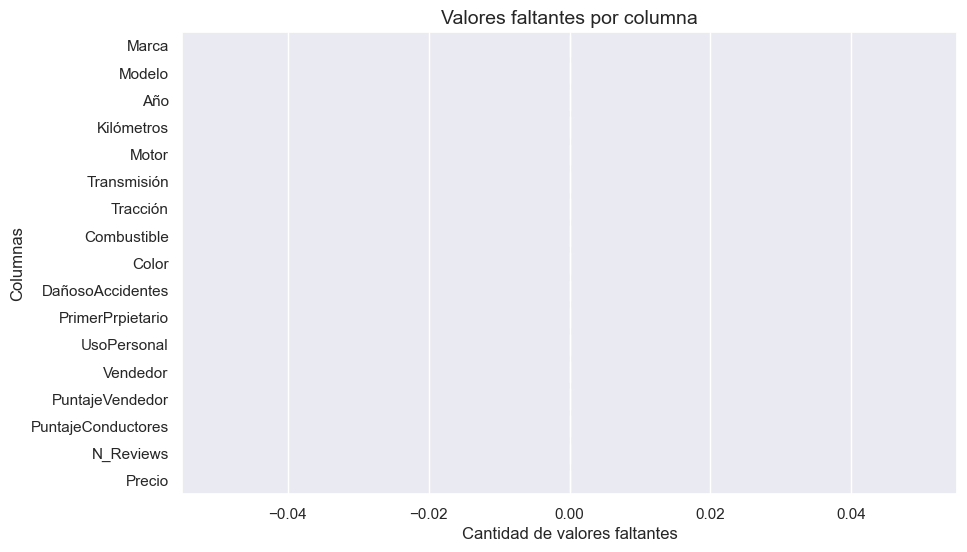

In [6]:
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title("Valores faltantes por columna", fontsize=14)
plt.xlabel("Cantidad de valores faltantes")
plt.ylabel("Columnas")
plt.show()

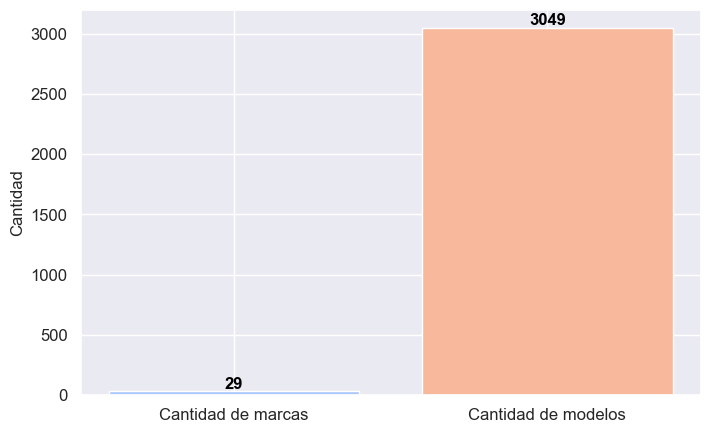

In [7]:
num_marcas = data["Marca"].nunique()
num_modelos = data["Modelo"].nunique()
stats = ["Cantidad de marcas", "Cantidad de modelos"]
values = [num_marcas, num_modelos]

plt.figure(figsize=(8, 5))
bars = plt.bar(stats, values, color=sns.color_palette("coolwarm", len(stats)))
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), 
             ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Cantidad")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: xlabel='Año'>

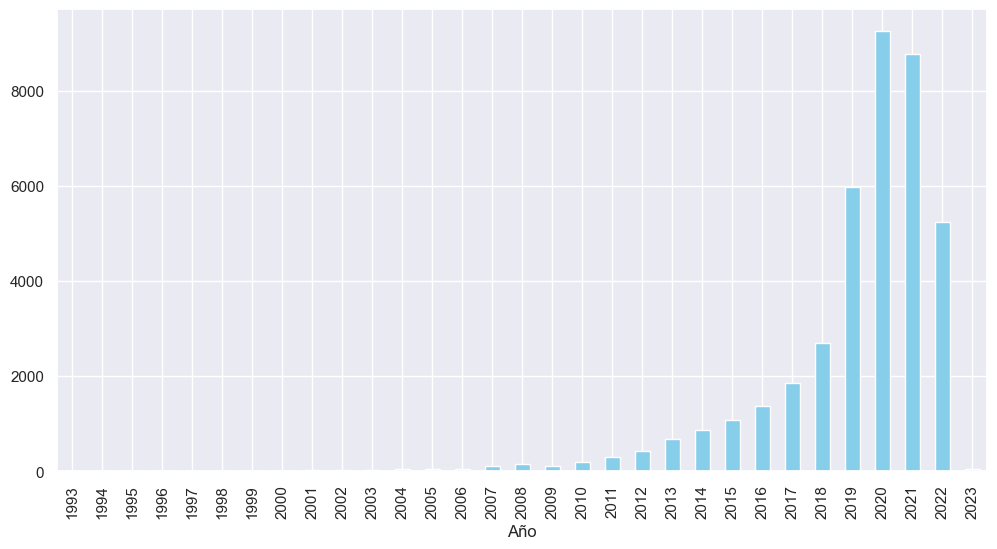

In [8]:
data['Año'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [9]:
data_2020 = data[(data['Año'] == 2020)]
porcentaje = (len(data_2020) / len(data)) * 100
print(f"{porcentaje:.2f}%")

data_2020 = data[(data['Año'] == 2020)]
cantidad = (len(data_2020))
print(f"{cantidad}")

23.46%
9245


In [10]:
data_2021 = data[(data['Año'] == 2021)]
porcentaje = (len(data_2021) / len(data)) * 100
print(f"{porcentaje:.2f}%")

data_2021 = data[(data['Año'] == 2021)]
cantidad = (len(data_2021))
print(f"{cantidad}")

22.26%
8770


In [11]:
cantidad_datos = data.columns.value_counts().sum() * data.shape[0]
print(cantidad_datos)

669817


### Preguntas Principales:

#### 1- Año:

C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\2718946724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Año", y="Precio", palette="viridis", showfliers = False)


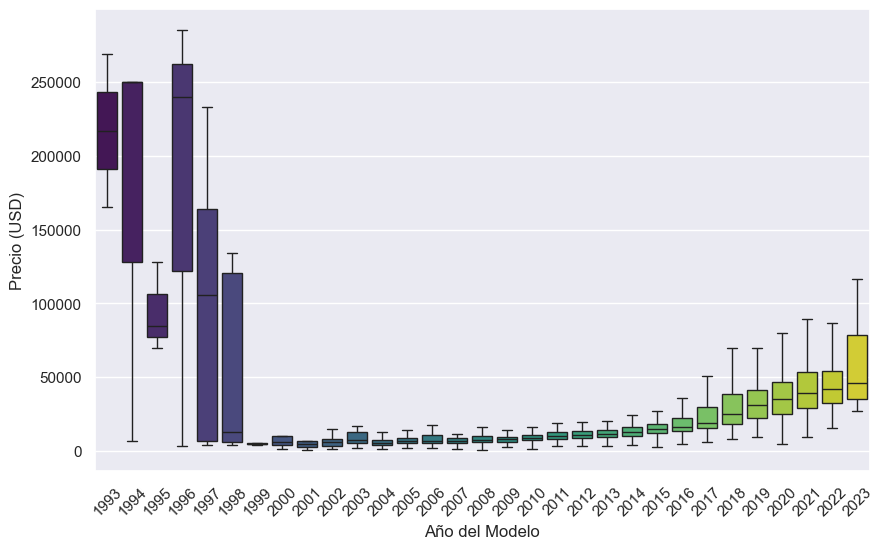

In [12]:
# -----------------------------
# Análisis: Año y valor del auto
# -----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Año", y="Precio", palette="viridis", showfliers = False)
plt.xticks(rotation=45)
plt.ylabel("Precio (USD)")
plt.xlabel("Año del Modelo")
plt.show()


C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\3431920151.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Precio', data=año1993_1998, palette="viridis", errorbar=None)


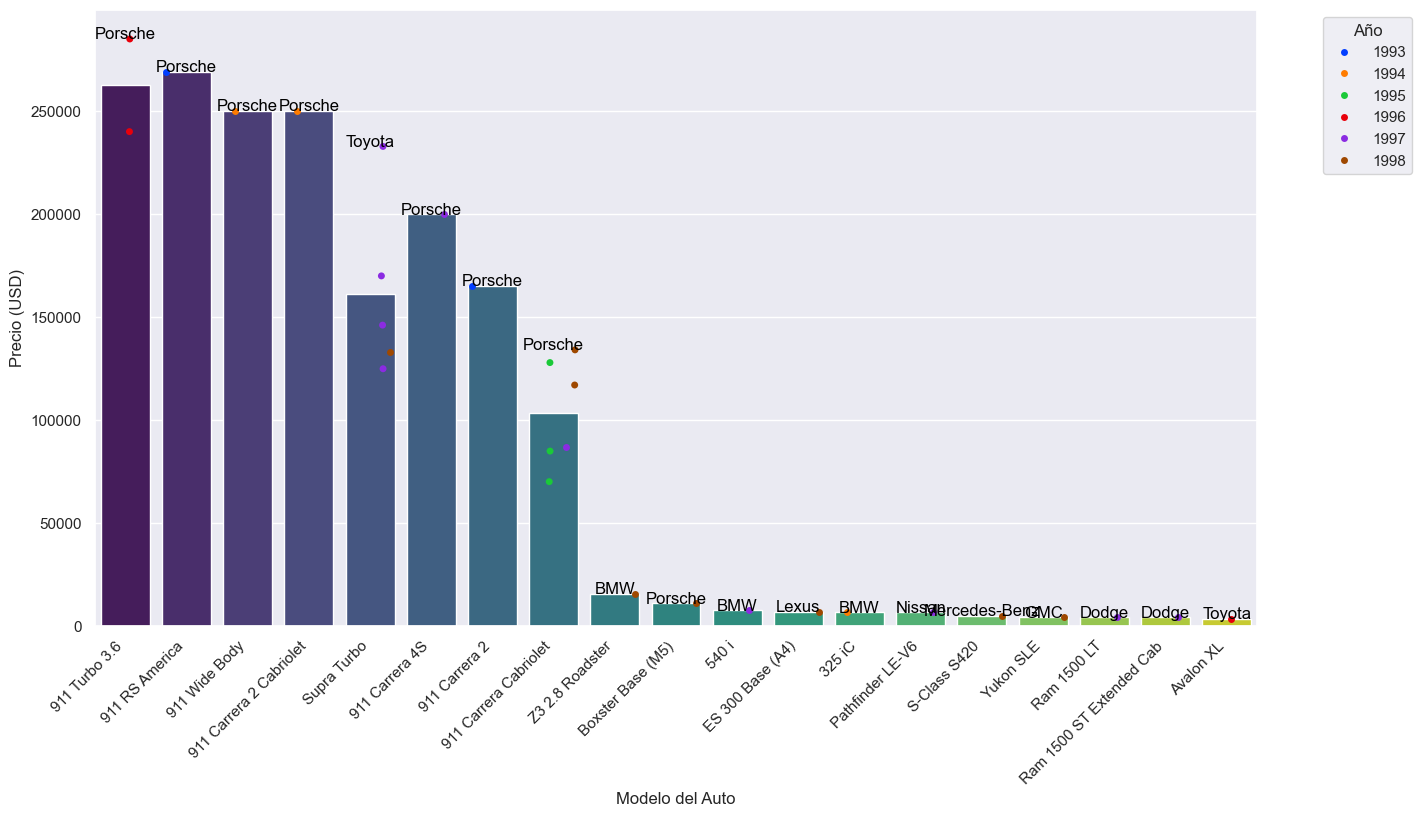

In [13]:

plt.figure(figsize=(15, 8))
año1993_1998 = data[(data['Año'] >= 1993) & (data['Año'] <= 1998)]
sns.barplot(x='Modelo', y='Precio', data=año1993_1998, palette="viridis", errorbar=None)    
sns.stripplot(x='Modelo', y='Precio', data=año1993_1998, hue='Año', palette="bright" ,dodge=True)

for i, modelo in enumerate(año1993_1998['Modelo'].unique()):
    marca = año1993_1998[año1993_1998['Modelo'] == modelo]['Marca'].iloc[0]
    plt.text(i, año1993_1998[año1993_1998['Modelo'] == modelo]['Precio'].max(), marca, 
             horizontalalignment='center', size='medium', color='black')   
    
plt.xticks(rotation=45, ha='right')
plt.ylabel("Precio (USD)")
plt.xlabel("Modelo del Auto")
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')


#### 2- Kilómetros:

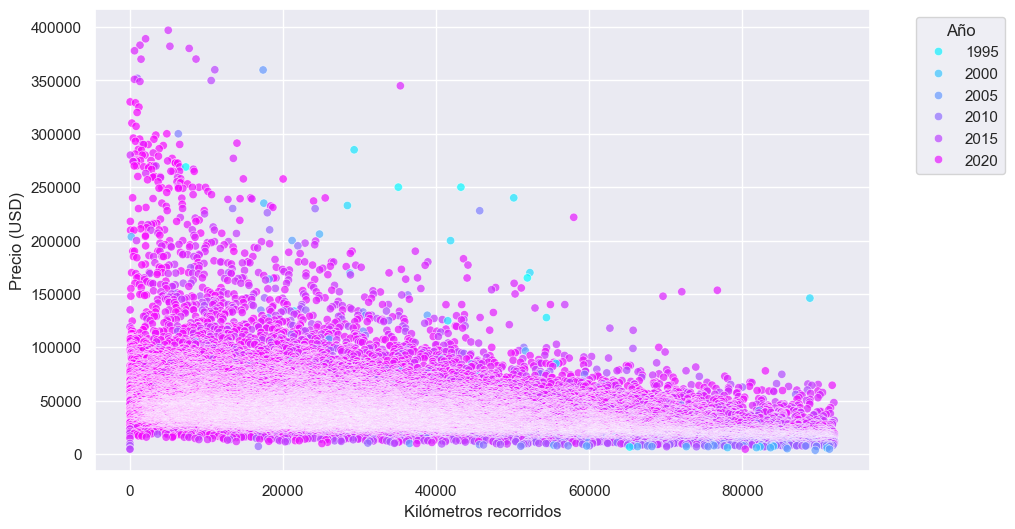

In [32]:
# -----------------------------
# Análisis: Kilómetros y valor del auto
# -----------------------------
Reduccion = data['Kilómetros'].quantile(0.9)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data[(data['Kilómetros']<Reduccion)], x="Kilómetros", y="Precio", hue="Año", palette="cool", alpha=0.7)
plt.ylabel("Precio (USD)")
plt.xlabel("Kilómetros recorridos")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


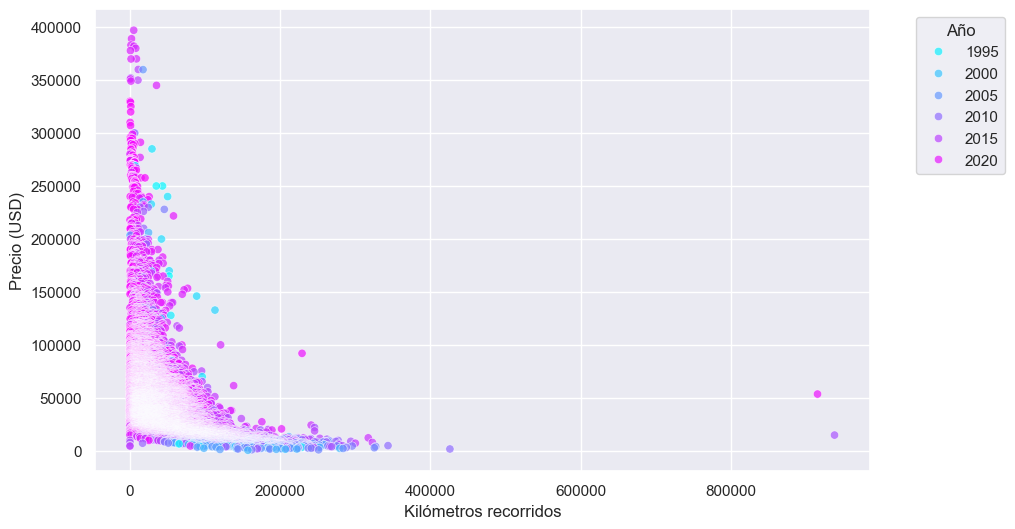

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Kilómetros", y="Precio", hue="Año", palette="cool", alpha=0.7)
plt.ylabel("Precio (USD)")
plt.xlabel("Kilómetros recorridos")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Axes: >

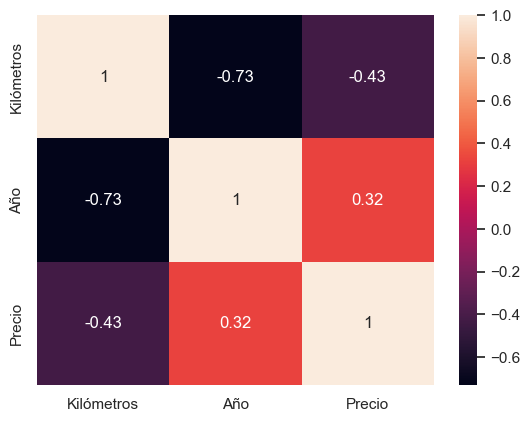

In [ ]:
# Como vimos en el anterior apartado de "Año", se encuentras los autos lujosos de 1993 hasta 1998, 
# lo que afecta en la correlación de los datos, por lo que se procederá a eliminar estos datos para obtener una correlación más precisa.
data_corr_1999 = data[data['Año'] >= 2000]

sns.heatmap(data_corr_1999[["Kilómetros","Año","Precio"]].corr(), annot=True)

#### 3- Daños:

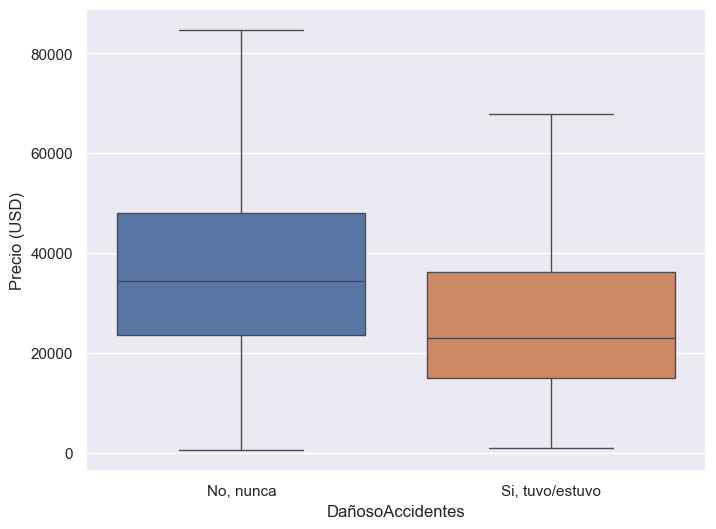

In [52]:
# -----------------------------
# Análisis: Daños o accidentes
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="DañosoAccidentes", y="Precio", hue='DañosoAccidentes',legend=False, showfliers = False)
plt.xticks([0, 1], ["No, nunca", "Si, tuvo/estuvo"])
plt.ylabel("Precio (USD)")
plt.show()


#### 4- Primer propietario:

C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\588348666.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="PrimerPrpietario", y="Precio", palette="Set1", showfliers = False)


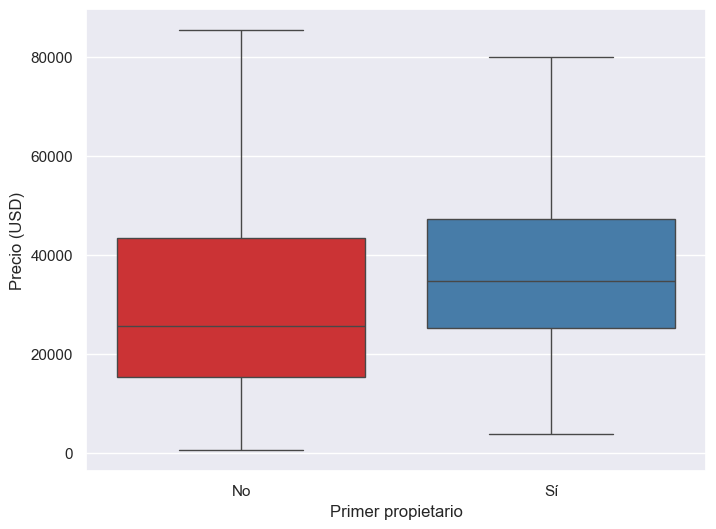

In [65]:
# -----------------------------
# Análisis: Primer propietario
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="PrimerPrpietario", y="Precio", palette="Set1", showfliers = False)
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Precio (USD)")
plt.xlabel("Primer propietario")
plt.show()


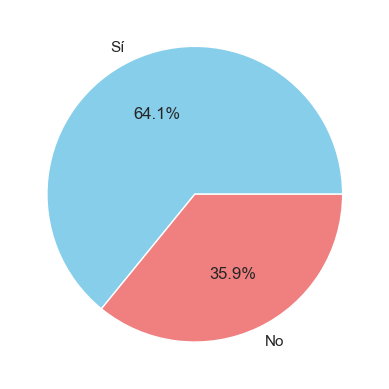

In [58]:
prctg_Si = (data['PrimerPrpietario'].value_counts()[1] / data['PrimerPrpietario'].value_counts().sum()) * 100

prctg_No = (data['PrimerPrpietario'].value_counts()[0] / data['PrimerPrpietario'].value_counts().sum()) * 100

plt.pie([prctg_Si, prctg_No], labels=["Sí", "No"], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.savefig("pieplot_transparente.png", transparent=True)

C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\3337664148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="PrimerPrpietario", y="Kilómetros", palette="Set1", showfliers = False)


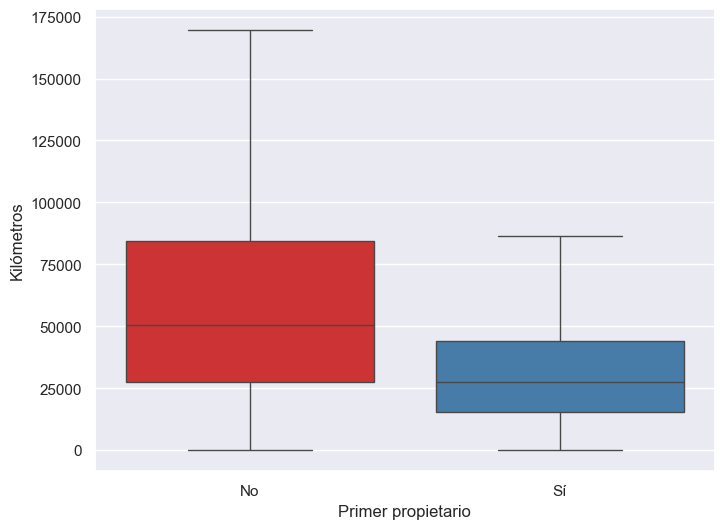

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="PrimerPrpietario", y="Kilómetros", palette="Set1", showfliers = False)
plt.xticks([0, 1], ["No", "Sí"])
plt.ylabel("Kilómetros")
plt.xlabel("Primer propietario")
plt.show()

### Preguntas Generales:

#### 1- Marcas más publicados:

C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\2053478306.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")


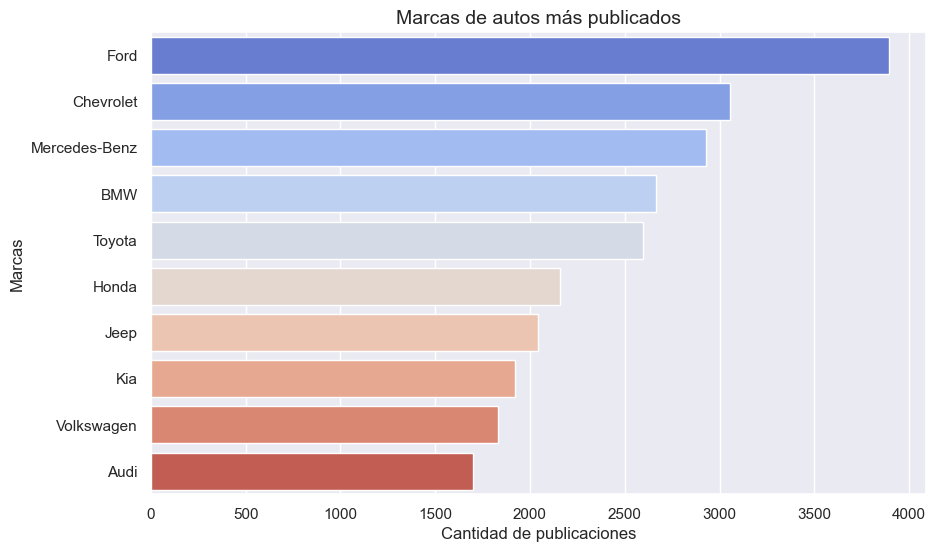

In [19]:
# -----------------------------
# Análisis: Marcas más publicados
# -----------------------------
plt.figure(figsize=(10, 6))
top_models = data["Marca"].value_counts().head(10)
sns.barplot(x=top_models.values, y=top_models.index, palette="coolwarm")
plt.title("Marcas de autos más publicados", fontsize=14)
plt.xlabel("Cantidad de publicaciones")
plt.ylabel("Marcas")
plt.show()


In [20]:
text1 = " ".join(Marca for Marca in data.Marca)

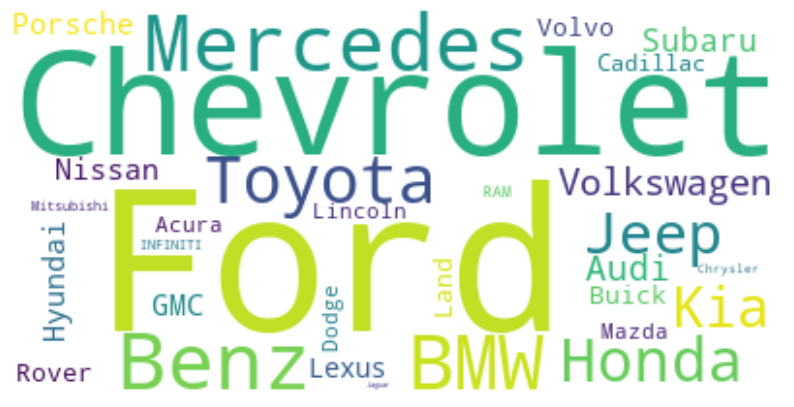

In [21]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text1)
plt.figure(figsize = (10,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 2.a- Menos valorados por personas

C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\383488119.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=peor_valorados.values, y=peor_valorados.index, palette="viridis")


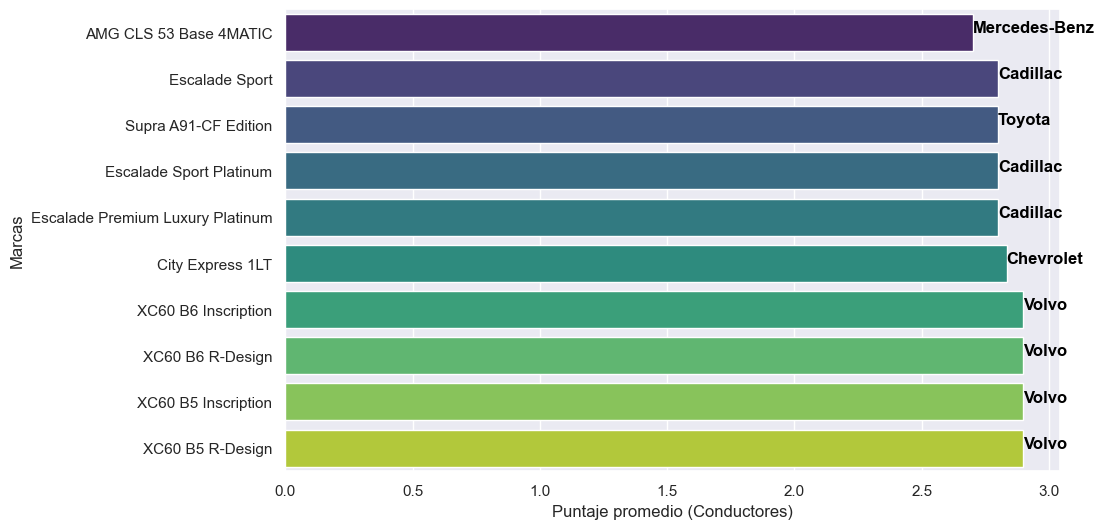

In [70]:
# -----------------------------
# Análisis: Modelos menos valorados por las personas
# -----------------------------
plt.figure(figsize=(10, 6))
peor_valorados = data.groupby("Modelo")["PuntajeConductores"].mean().sort_values(ascending=True).head(10)
sns.barplot(x=peor_valorados.values, y=peor_valorados.index, palette="viridis")
    
for i, modelo in enumerate(peor_valorados.index):
    marca = data[data['Modelo'] == modelo]['Marca'].iloc[0]
    plt.text(peor_valorados.values[i], i, marca, 
             horizontalalignment='left', size='medium', color='black', weight='semibold')
    

plt.xlabel("Puntaje promedio (Conductores)")
plt.ylabel("Marcas")
plt.show()

#### 2.b- Vendedores menos valorados:

C:\Users\ema04\AppData\Local\Temp\ipykernel_4272\802787699.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=puntajeven.values, y=puntajeven.index, palette="viridis")


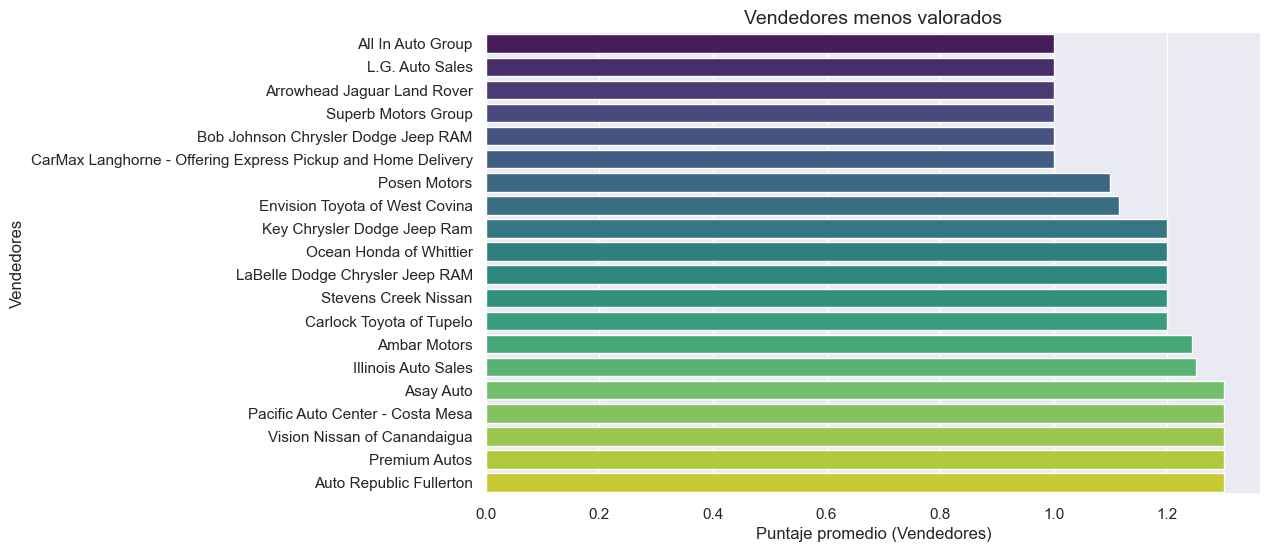

In [80]:
# -----------------------------
# Análisis: Vendedores menos valorados
# -----------------------------
plt.figure(figsize=(10, 6))
puntajeven = data.groupby("Vendedor")["PuntajeVendedor"].mean().sort_values(ascending=True).head(20)
sns.barplot( x=puntajeven.values, y=puntajeven.index, palette="viridis")
plt.title("Vendedores menos valorados", fontsize=14)
plt.xlabel("Puntaje promedio (Vendedores)")
plt.ylabel("Vendedores")
plt.show()

##### 2.b- Porqué son tan poco valorados?

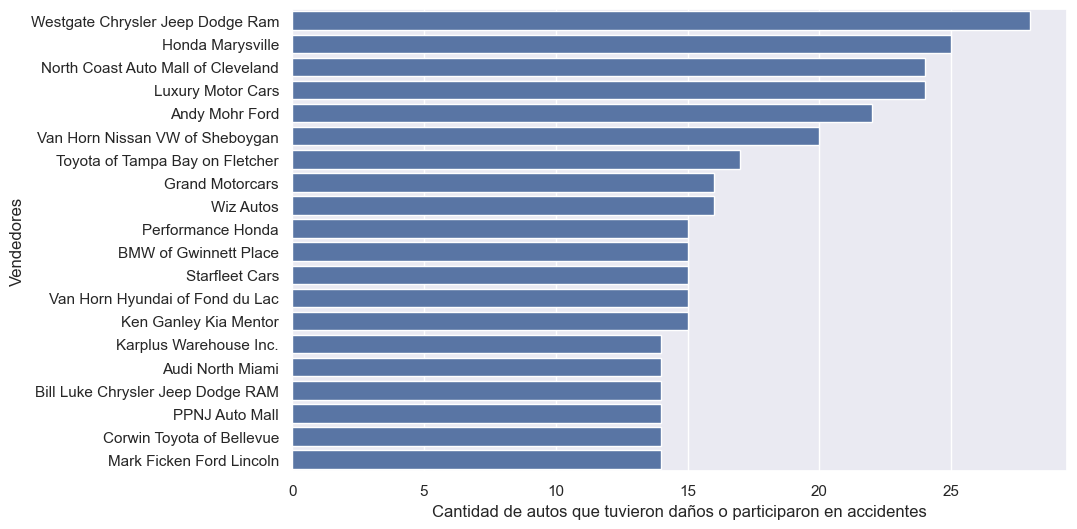

In [84]:
plt.figure(figsize=(10, 6))
autos_danados = data[data["DañosoAccidentes"] == 1]
vendedores_con_danados = autos_danados["Vendedor"].value_counts().head(20)
sns.barplot(x=vendedores_con_danados.values, y=vendedores_con_danados.index, errorbar=None)
plt.xlabel("Cantidad de autos que tuvieron daños o participaron en accidentes")
plt.ylabel("Vendedores")
plt.show()

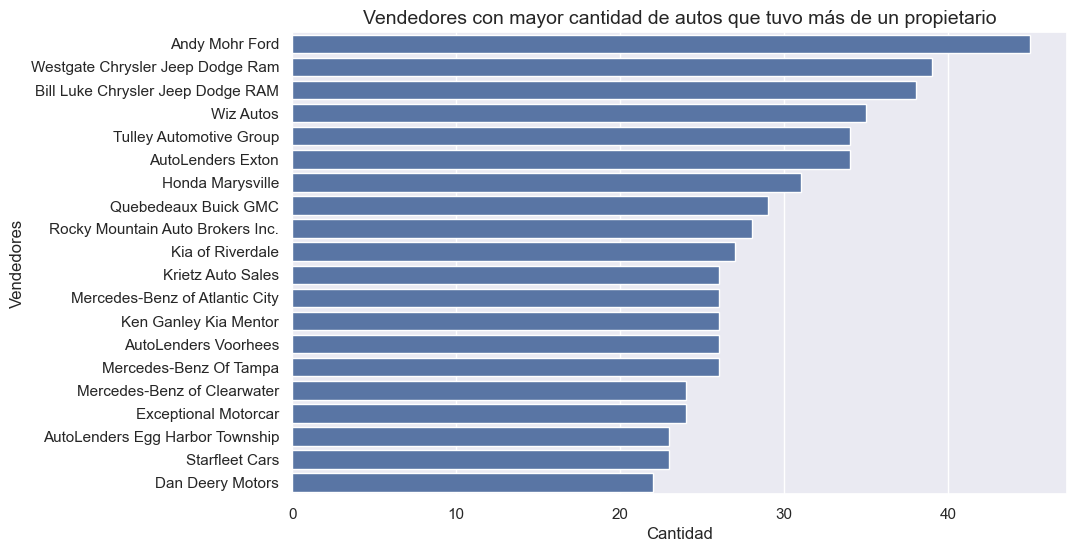

In [72]:
plt.figure(figsize=(10, 6))
autos_danados = data[data["PrimerPrpietario"] == 0]
vendedores_con_danados = autos_danados["Vendedor"].value_counts().head(20)
sns.barplot(x=vendedores_con_danados.values, y=vendedores_con_danados.index, errorbar=None)
plt.title("Vendedores con mayor cantidad de autos que tuvo más de un propietario", fontsize=14)
plt.xlabel("Cantidad")
plt.ylabel("Vendedores")
plt.show()

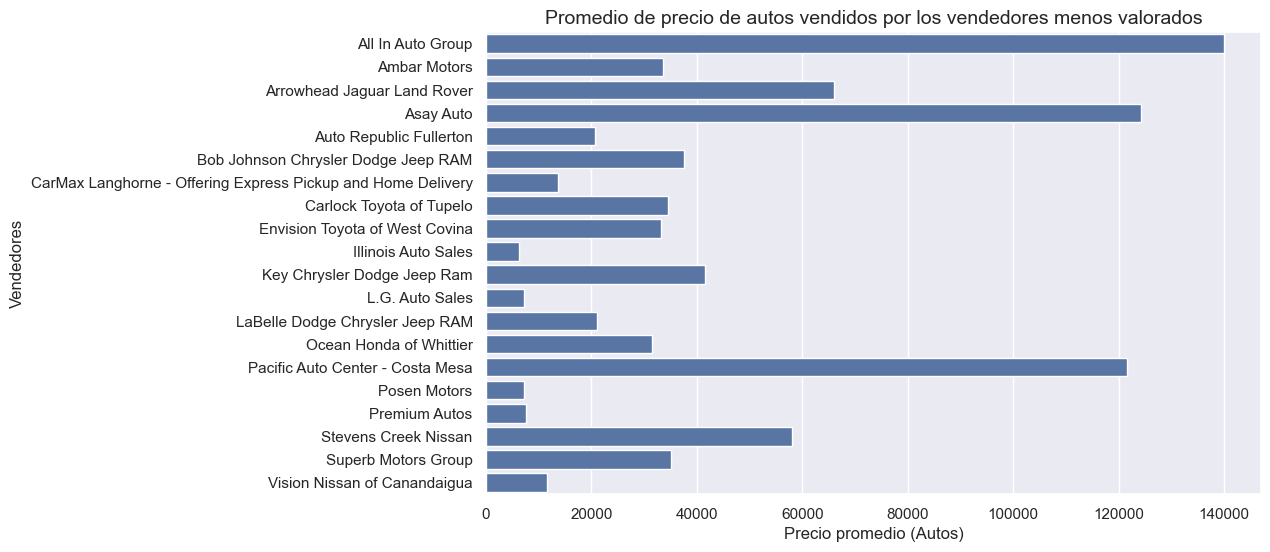

In [83]:
menos_valorados = puntajeven.index
precioprom = data[data["Vendedor"].isin(menos_valorados)].groupby("Vendedor")["Precio"].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=precioprom.values, y=precioprom.index)
plt.title("Promedio de precio de autos vendidos por los vendedores menos valorados", fontsize=14)
plt.xlabel("Precio promedio (Autos)")
plt.ylabel("Vendedores")
plt.show()